In [12]:
import pandas as pd
import datetime as dt
#from pandas.io.data import DataReader
#from pandas_datareader.data import DataReader
import yfinance as yf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
start, end = dt.datetime(2012, 1, 1), dt.datetime(2013, 12, 31)

tickers = ['AAPL', 'GOOG', 'MSFT', 'V', 'WDC', 'KLAC']

prices = pd.DataFrame()

for ticker in tickers:
    prices[ticker] = yf.download(ticker, start=start, end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
prices.head()

,AAPL,GOOG,MSFT,V,WDC,KLAC
Date,,,,,,
2012-01-03 00:00:00+00:00,14.686786,16.573130,26.770000,25.747499,30.980000,47.459999
2012-01-04 00:00:00+00:00,14.765714,16.644611,27.400000,25.287500,31.299999,46.910000
2012-01-05 00:00:00+00:00,14.929643,16.413727,27.680000,25.477501,32.759998,47.520000
2012-01-06 00:00:00+00:00,15.085714,16.189817,28.110001,25.177500,33.490002,47.730000
2012-01-09 00:00:00+00:00,15.061786,15.503389,27.740000,24.975000,33.750000,48.180000


In [9]:
returns = prices.pct_change()
returns.head()

,AAPL,GOOG,MSFT,V,WDC,KLAC
Date,,,,,,
2012-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,0.005374,0.004313,0.023534,-0.017866,0.010329,-0.011589
2012-01-05 00:00:00+00:00,0.011102,-0.013871,0.010219,0.007514,0.046645,0.013004
2012-01-06 00:00:00+00:00,0.010454,-0.013642,0.015535,-0.011775,0.022283,0.004419
2012-01-09 00:00:00+00:00,-0.001586,-0.042399,-0.013163,-0.008043,0.007763,0.009428


Eigenvalues of the Covariance Matrix

In [11]:
# Remove first row of NaNs
returns = returns.iloc[1:, :] 

training_period = 30
in_sample = returns.iloc[:(returns.shape[0]-training_period), :].copy()
tickers = returns.columns.copy()

Text(0.5, 1.0, '2nd E.V. Eigenportfolio')

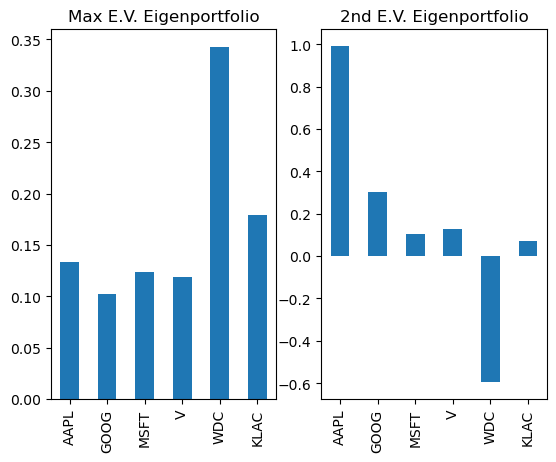

In [13]:
covariance_matrix = in_sample.cov()

D, S = np.linalg.eigh(covariance_matrix)

eigenportfolio_1 = S[:,-1] / np.sum(S[:,-1]) # Normalize to sum to 1
eigenportfolio_2 = S[:,-2] / np.sum(S[:,-2]) # Normalize to sum to 1

eigenportfolio1 = pd.DataFrame(data= eigenportfolio_1, columns = ['Investment Weight'], index = tickers)
eigenportfolio2 = pd.DataFrame(data= eigenportfolio_2, columns = ['Investment Weight'], index = tickers)

f = plt.figure()
    
ax = plt.subplot(121)
eigenportfolio1.plot(kind='bar', ax=ax, legend=False)
plt.title("Max E.V. Eigenportfolio")

ax = plt.subplot(122)
eigenportfolio2.plot(kind='bar', ax=ax, legend=False)
plt.title("2nd E.V. Eigenportfolio")

Text(0.5, 1.0, 'AAPL')

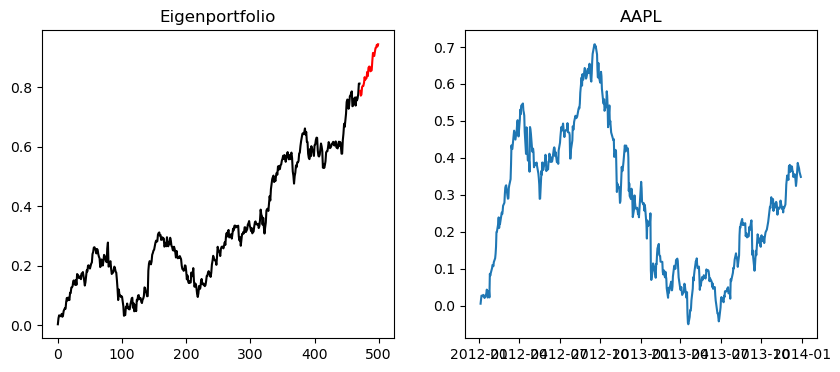

In [15]:
def get_cumulative_returns_over_time(sample, weights):
    return (((1+sample).cumprod(axis=0))-1).dot(weights)

in_sample_ind = np.arange(0, (returns.shape[0]-training_period+1))
out_sample_ind = np.arange((returns.shape[0]-training_period+1), returns.shape[0])

cumulative_returns = get_cumulative_returns_over_time(returns, eigenportfolio1).values
    
f = plt.figure(figsize=(10,4))

ax = plt.subplot(121)
ax.plot(cumulative_returns[in_sample_ind], 'black')
ax.plot(out_sample_ind,cumulative_returns[out_sample_ind], 'r')
plt.title("Eigenportfolio")

ax = plt.subplot(122)
plt.plot((((1+returns.loc[:,'AAPL']).cumprod(axis=0))-1))
plt.title("AAPL")

REF: https://srome.github.io/Eigenvesting-I-Linear-Algebra-Can-Help-You-Choose-Your-Stock-Portfolio/